<a href="https://colab.research.google.com/github/Pranoy13/Sales-Prediction-Model/blob/main/Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath=r'/content/drive/MyDrive/advertising.csv'

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
print(df.shape)

(200, 4)


Exploratory Data Analysis (EDA)

1.Viewing Data

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


2.Visualizing Data

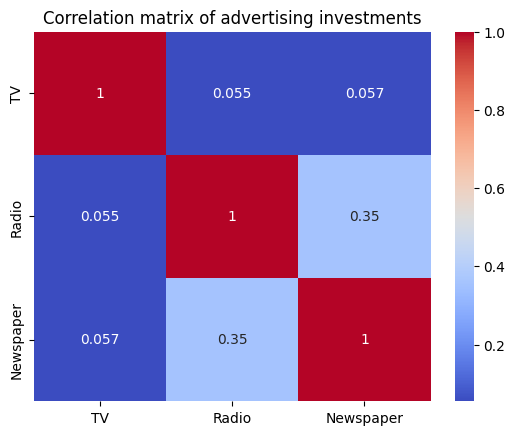

In [ ]:
correlation_matrix = df[['TV', 'Radio', 'Newspaper']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
_ = plt.title('Correlation matrix of advertising investments')

<Axes: title={'center': 'Box plot of Sales by advertising medium'}, xlabel='Newspaper', ylabel='Sales'>

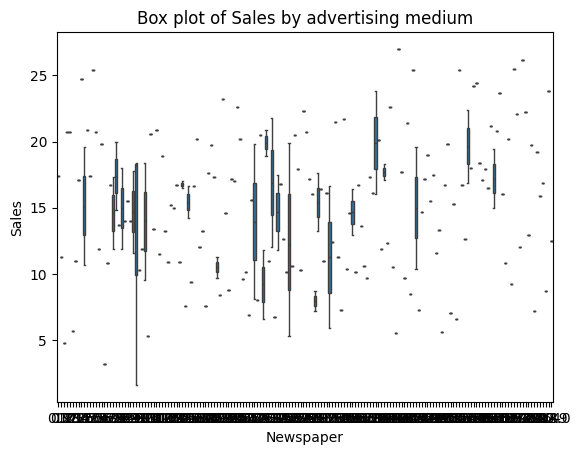

In [ ]:
plt.title('Box plot of Sales by advertising medium')
sns.boxplot(x='Newspaper', y='Sales', data=df)

<Axes: title={'center': 'Average TV, Radio, and Newspaper vs Sales'}, xlabel='TV', ylabel='Radio'>

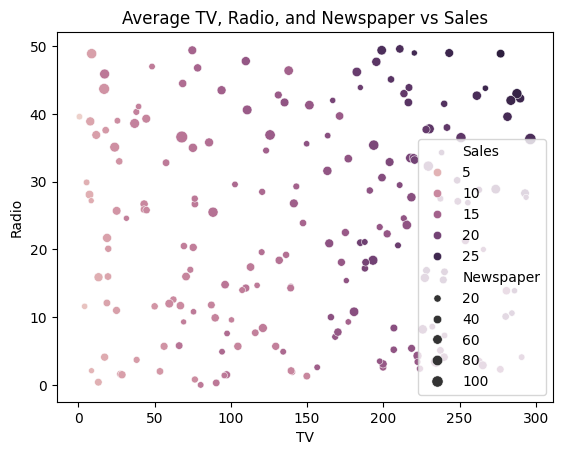

In [ ]:
plt.title('Average TV, Radio, and Newspaper vs Sales')
sns.scatterplot(data=df, x='TV', y='Radio', size='Newspaper', hue='Sales')

Statistical **Analysis**

In [ ]:
df[['TV', 'Radio', 'Newspaper']].corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


Data Preprocessing

---



In [ ]:
X = df.drop(columns='Sales')
y = df.Sales

In [ ]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
#Splitting the Dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Building**

**Linear Regression**

In [ ]:
# Training
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluation
y_pred = LR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  2.9077569102710896


**Support Vector Machine (SVM)**

In [ ]:
SVM = SVR()
SVM.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = SVM.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  3.499087197255254


**K - Nearest Neighbors (KNN)**

In [ ]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = KNN.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  3.115529999999999


Decision Tree

In [ ]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = DT.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  2.74375


Random Forest

In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = RF.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  1.4159637250000023


In [ ]:
#Model with good performance: Random Forest